# 0. Setup Paths

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': r"C:\Tensorflow\models",
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [6]:
# https://www.tensorflow.org/install/source_windows

In [7]:
if os.name=='nt':
    !pip install wget
    import wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=cf54334b7b29d0c9f8ab8135b446896a83416f03321806ad6c45cb7c62df93f8
  Stored in directory: c:\users\kaushik pal\appdata\local\pip\cache\wheels\bd\a8\c3\3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [8]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [9]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

100% [..............................................] 1468733 / 1468733        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-37: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-37: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-37: module MAY be using inspect.stack
zip_safe flag not set; analyzing archive contents...
zip_safe flag not set; analyzing archive contents...
cpuinfo.__pycache__.cpuinfo.cpython-37: module references __file__
zip_safe flag not set; analyzing archive contents...
error: numpy 1.20.2 is installed but numpy<1.20.0,>=1.14.3 is required by {'apache-beam'}


copying build\lib\nets\i3d.py -> build\bdist.win-amd64\egg\nets
copying build\lib\nets\i3d_test.py -> build\bdist.win-amd64\egg\nets
copying build\lib\nets\i3d_utils.py -> build\bdist.win-amd64\egg\nets
copying build\lib\nets\inception.py -> build\bdist.win-amd64\egg\nets
copying build\lib\nets\inception_resnet_v2.py -> build\bdist.win-amd64\egg\nets
copying build\lib\nets\inception_resnet_v2_test.py -> build\bdist.win-amd64\egg\nets
copying build\lib\nets\inception_utils.py -> build\bdist.win-amd64\egg\nets
copying build\lib\nets\inception_v1.py -> build\bdist.win-amd64\egg\nets
copying build\lib\nets\inception_v1_test.py -> build\bdist.win-amd64\egg\nets
copying build\lib\nets\inception_v2.py -> build\bdist.win-amd64\egg\nets
copying build\lib\nets\inception_v2_test.py -> build\bdist.win-amd64\egg\nets
copying build\lib\nets\inception_v3.py -> build\bdist.win-amd64\egg\nets
copying build\lib\nets\inception_v3_test.py -> build\bdist.win-amd64\egg\nets
copying build\lib\nets\inception_

Obtaining file:///D:/YouTube/OD/TFODCourse/Tensorflow/models/research/slim
  Attempting uninstall: slim
    Found existing installation: slim 0.1
    Uninstalling slim-0.1:
      Successfully uninstalled slim-0.1
  Running setup.py develop for slim


In [16]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2021-04-03 11:13:18.258898: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
Running tests under Python 3.7.3: D:\YouTube\OD\TFODCourse\tfod\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model
2021-04-03 11:13:24.537172: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-04-03 11:13:24.563275: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:2b:00.0 name: GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.785GHz coreCount: 40 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2021-04-03 11:13:24.563310: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:13:25.034685: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cublas64_1

I0403 11:13:37.327793  4864 efficientnet_model.py:147] round_filter input=40 output=80
I0403 11:13:37.327793  4864 efficientnet_model.py:147] round_filter input=80 output=160
I0403 11:13:37.769363  4864 efficientnet_model.py:147] round_filter input=80 output=160
I0403 11:13:37.769363  4864 efficientnet_model.py:147] round_filter input=112 output=224
I0403 11:13:38.237657  4864 efficientnet_model.py:147] round_filter input=112 output=224
I0403 11:13:38.237657  4864 efficientnet_model.py:147] round_filter input=192 output=384
I0403 11:13:39.077081  4864 efficientnet_model.py:147] round_filter input=192 output=384
I0403 11:13:39.077081  4864 efficientnet_model.py:147] round_filter input=320 output=640
I0403 11:13:39.359760  4864 efficientnet_model.py:147] round_filter input=1280 output=2560
I0403 11:13:39.393760  4864 efficientnet_model.py:458] Building model efficientnet with params ModelConfig(width_coefficient=2.0, depth_coefficient=3.1, resolution=600, dropout_rate=0.5, blocks=(BlockC

In [15]:
!pip install tensorflow --upgrade

  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached grpcio-1.34.1-cp37-cp37m-win_amd64.whl (2.9 MB)
  Using cached h5py-3.1.0-cp37-cp37m-win_amd64.whl (2.7 MB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard-2.4.1-py3-none-any.whl (10.6 MB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached tf_estimator_nightly-2.5.0.dev2021032501-py2.py3-none-any.whl (462 kB)
  Using cached wrapt-1.12.1-cp37-cp37m-win_amd64.whl
  Using cached cached_property-1.5.2-py2.py3-none-any.whl (7.6 kB)
  Using cached google_auth_oauthlib-0.4.4-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.28.0 requires crcmod<2.0,>=1.7, which is not installed.
apache-beam 2.28.0 requires dill<0.3.2,>=0.3.1.1, which is not installed.
apache-beam 2.28.0 requires fastavro<2,>=0.21.4, which is not installed.
apache-beam 2.28.0 requires future<1.0.0,>=0.18.2, which is not installed.
apache-beam 2.28.0 requires hdfs<3.0.0,>=2.1.0, which is not installed.
apache-beam 2.28.0 requires httplib2<0.18.0,>=0.8, which is not installed.
apache-beam 2.28.0 requires mock<3.0.0,>=1.0.1, which is not installed.
tensorflow-datasets 4.2.0 requires attrs>=18.1.0, which is not installed.
tensorflow-datasets 4.2.0 requires dill, which is not installed.
tensorflow-datasets 4.2.0 requires future, which is not installed.
tensorflow-datasets 4.2.0 requires importlib-resources, which is not installed.
tensorflow-datasets 4.2.0 re

In [13]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.15.7
Uninstalling protobuf-3.15.7:
  Successfully uninstalled protobuf-3.15.7
Found existing installation: matplotlib 3.4.1
Uninstalling matplotlib-3.4.1:
  Successfully uninstalled matplotlib-3.4.1

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.28.0 requires crcmod<2.0,>=1.7, which is not installed.
apache-beam 2.28.0 requires dill<0.3.2,>=0.3.1.1, which is not installed.
apache-beam 2.28.0 requires fastavro<2,>=0.21.4, which is not installed.
apache-beam 2.28.0 requires future<1.0.0,>=0.18.2, which is not installed.
apache-beam 2.28.0 requires grpcio<2,>=1.29.0, which is not installed.
apache-beam 2.28.0 requires hdfs<3.0.0,>=2.1.0, which is not installed.
apache-beam 2.28.0 requires httplib2<0.18.0,>=0.8, which is not installed.
apache-beam 2.28.0 requires mock<3.0.0,>=1.0.1, which is not installed.
tensorflow 2.5.0rc0 requires astunparse~=1.6.3, which is not installed.
tensorflow 2.5.0rc0 requires flatbuffers~=1.12.0, which is not installed.
tensorflow 2.5.0rc0 requires gast==0.4.0, which is not installed.
tensorflow 2.5.0rc0 requires go


  Using cached matplotlib-3.2.0-cp37-cp37m-win_amd64.whl (9.2 MB)


In [17]:
import object_detection

In [18]:
!pip list

Package                       Version             Location
----------------------------- ------------------- --------------------------------------------------------
absl-py                       0.12.0
apache-beam                   2.28.0
astunparse                    1.6.3
avro-python3                  1.10.2
backcall                      0.2.0
cached-property               1.5.2
cachetools                    4.2.1
certifi                       2020.12.5
chardet                       4.0.0
colorama                      0.4.4
contextlib2                   0.6.0.post1
cycler                        0.10.0
cython                        3.0a6
dataclasses                   0.8
decorator                     5.0.3
flatbuffers                   1.12
gast                          0.4.0
gin-config                    0.4.0
google-api-python-client      2.1.0
google-auth                   1.28.0
google-auth-oauthlib          0.4.4
google-cloud-bigquery         2.13.1
google-pasta                 

In [8]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [..............................................................] 20515344 / 20515344        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [9]:
labels = [{'name':'licence', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [10]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

Cloning into 'Tensorflow\scripts'...


In [36]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


# 4. Copy Model Config to Training Folder

In [12]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [13]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [14]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [15]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [20]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [21]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [22]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [28]:
paths['APIMODEL_PATH'] = r"C:\Tensorflow\models"

In [29]:
os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

'C:\\Tensorflow\\models\\research\\object_detection\\model_main_tf2.py'

In [6]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [32]:
files['PIPELINE_CONFIG']

'Tensorflow\\workspace\\models\\my_ssd_mobnet\\pipeline.config'

In [33]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=10000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [34]:
print(command)

python C:\Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=10000


In [ ]:
!{command}

# 7. Evaluate the Model

In [17]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [18]:
print(command)

python C:\Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet


In [19]:
!{command}

creating index...

W0717 06:57:31.798618 26168 model_lib_v2.py:1089] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0717 06:57:31.798618 26168 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0717 06:57:31.798618 26168 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0717 06:57:31.798618 26168 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0717 06:57:31.798618 26168 model_lib_v2.py:1106] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2022-07-17 06:57:31.801424: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To 


index created!
creating index...
index created!


    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    
W0717 06:58:07.991183 26168 deprecation.py:350] From C:\Users\Kaushik Pal\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:459: py_func (from tensorflow.python.ops.script_ops) is deprecated and will be removed in a future version.
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    t

# 8. Load Train Model From Checkpoint

In [5]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [6]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-106')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [7]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [9]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'Cars425.png')

In [37]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

In [47]:
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

In [48]:
detections

{'detection_boxes': array([[0.44410542, 0.41035768, 0.5770213 , 0.60153735],
        [0.97701925, 0.4325666 , 1.        , 0.5907221 ],
        [0.452589  , 0.46547973, 0.5782423 , 0.58175755],
        [0.9770443 , 0.48208275, 1.        , 0.6323433 ],
        [0.9783668 , 0.39208034, 1.        , 0.5328792 ],
        [0.4051432 , 0.41310775, 0.60931045, 0.6234033 ],
        [0.13345397, 0.35965148, 0.15972984, 0.46053347],
        [0.46044576, 0.42081082, 0.5721024 , 0.54726875],
        [0.9785953 , 0.34517187, 0.99961454, 0.48698658],
        [0.13828126, 0.36534035, 0.16689491, 0.41696304],
        [0.1361954 , 0.3838739 , 0.16427325, 0.43915161],
        [0.34543714, 0.4466104 , 0.42114875, 0.559622  ],
        [0.97863275, 0.53200155, 1.        , 0.6875226 ],
        [0.12081826, 0.3632654 , 0.15158811, 0.44995153],
        [0.30600855, 0.46431434, 0.41546628, 0.5412637 ],
        [0.11482052, 0.36619914, 0.14523575, 0.41414368],
        [0.11029881, 0.38647127, 0.14072245, 0.438491

In [49]:
detections['detection_classes']

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [50]:
category_index

{1: {'id': 1, 'name': 'licence'}}

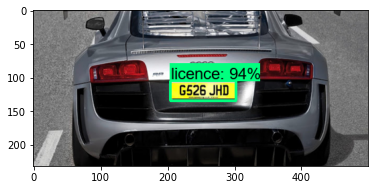

In [10]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [36]:
detections

{'detection_boxes': array([[0.44410542, 0.41035768, 0.5770213 , 0.60153735],
        [0.97701925, 0.4325666 , 1.        , 0.5907221 ],
        [0.452589  , 0.46547973, 0.5782423 , 0.58175755],
        [0.9770443 , 0.48208275, 1.        , 0.6323433 ],
        [0.9783668 , 0.39208034, 1.        , 0.5328792 ],
        [0.4051432 , 0.41310775, 0.60931045, 0.6234033 ],
        [0.13345397, 0.35965148, 0.15972984, 0.46053347],
        [0.46044576, 0.42081082, 0.5721024 , 0.54726875],
        [0.9785953 , 0.34517187, 0.99961454, 0.48698658],
        [0.13828126, 0.36534035, 0.16689491, 0.41696304],
        [0.1361954 , 0.3838739 , 0.16427325, 0.43915161],
        [0.34543714, 0.4466104 , 0.42114875, 0.559622  ],
        [0.97863275, 0.53200155, 1.        , 0.6875226 ],
        [0.12081826, 0.3632654 , 0.15158811, 0.44995153],
        [0.30600855, 0.46431434, 0.41546628, 0.5412637 ],
        [0.11482052, 0.36619914, 0.14523575, 0.41414368],
        [0.11029881, 0.38647127, 0.14072245, 0.438491

In [12]:
!pip install pytesseract

  Attempting uninstall: packaging
    Found existing installation: packaging 21.0
    Uninstalling packaging-21.0:
      Successfully uninstalled packaging-21.0


In [49]:
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util
import numpy as np
import pytesseract
import cv2
import re
from copy import deepcopy


physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except Exception as e:
    print(e)



class ModelLoader:
    @classmethod
    def getModel(cls):
        configs = config_util.get_configs_from_pipeline_file(r"Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config")
        detection_model = model_builder.build(
            model_config=configs["model"], is_training=False
        )

        # Restore checkpoint
        ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
        ckpt.restore(r"Tensorflow/workspace/models/my_ssd_mobnet/ckpt-106").expect_partial()
        category_index = label_map_util.create_category_index_from_labelmap(
            r"Tensorflow/workspace/annotations/label_map.pbtxt"
        )
        return detection_model, category_index


class Detector:
    detection_model, category_index = ModelLoader.getModel()

    def processDetections(self, detections, threshold):
        num_detections = int(detections.pop("num_detections"))
        detections = {
            key: value[0, :num_detections].numpy() for key, value in detections.items()
        }
        detections["num_detections"] = num_detections

        # detection_classes should be ints.
        detections["detection_classes"] = detections["detection_classes"].astype(
            np.int64
        )

        scores = list(filter(lambda x: x > threshold, detections["detection_scores"]))
        boxes = detections["detection_boxes"][: len(scores)]
        classes = detections["detection_classes"][: len(scores)]
        return boxes, classes

    def labeling(self, image, threshold=0.75, max_boxes=5):
        detection_model = Detector.detection_model

        @tf.function
        def detect_fn(image):
            image, shapes = detection_model.preprocess(image)
            prediction_dict = detection_model.predict(image, shapes)
            detections = detection_model.postprocess(prediction_dict, shapes)
            return detections

        image_np = np.array(image)
        height, width = image_np.shape[:2]
        input_tensor = tf.convert_to_tensor(
            np.expand_dims(image_np, 0), dtype=tf.float32
        )
        detections = detect_fn(input_tensor)

        boxes, classes = self.processDetections(detections, threshold)
        boxes = boxes * np.array([height, width, height, width])
        boxes = boxes.astype("uint32")
        img_copy = deepcopy(image)
        img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
        # boxes = [box1, box2, box3, ,,,,,]
        # box = [w, x, y, z]
        # pt1 = box[1], box[0] upper left (x, w)
        # pt2 = box[3], box[2] lower right (z, y)
        for box in boxes:
            print('called recognize_plate')
            self.recognize_plate(img, box)

        return image
    
    def recognize_plate(self, image, box):
        xmin, ymin, xmax, ymax = box
        cropedImage = image[xmin+5:xmax+5, ymin+5:ymax+5]
        plt.imshow(cropedImage)
        plt.show()
        # preprocesing
        grayImage = cv2.cvtColor(cropedImage, cv2.COLOR_BGR2GRAY)
        grayImage = cv2.resize(grayImage, None, fx = 3, fy = 3, interpolation = cv2.INTER_CUBIC)
        blurImage = cv2.GaussianBlur(grayImage, (5,5), 0)
        ret, thresh = cv2.threshold(grayImage, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
        rect_kern = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
        dilation = cv2.dilate(thresh, rect_kern, iterations = 1)

        try:
            contours, hierarchy = cv2.findContours(dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        except Exception as e:
            ret_img, contours, hierarchy = cv2.findContours(dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
        sorted_contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])
        image2 = grayImage.copy()
        plate_num = ""
        
        for cnt in sorted_contours:
            x,y,w,h = cv2.boundingRect(cnt)

            height, width = image2.shape
            if height / h > 6:
                continue

            ratio = h / w

            if ratio < 1.5:
                continue

            if width / w > 15:
                continue

            area = h * w
            if area < 100: 
                continue

            rect = cv2.rectangle(image2, (x,y), (x+w, y+h), (0,255,0),2)
            plt.imshow(rect)
            plt.show()
            roi = thresh[y-5:y+h+5, x-5:x+w+5]
            plt.imshow(roi)
            plt.show()
            roi = cv2.bitwise_not(roi)
            roi = cv2.medianBlur(roi, 5)
            try:
                text = pytesseract.image_to_string(roi, config='-c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ --psm 8 --oem 3')
                clean_text = re.sub(r'[\W_]+', '', text)
                plate_num += clean_text
            except: 
                text = None

        if plate_num != None:
            print("License Plate #: ", plate_num)

        return plate_num
        


Physical devices cannot be modified after being initialized


In [50]:
d = Detector()

called recognize_plate


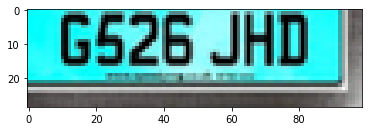

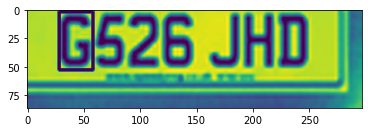

C:\Users\KAUSHI~1\AppData\Local\Temp/ipykernel_8332/1034967493.py:135: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(roi)


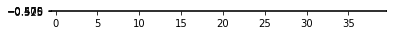

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\median_blur.dispatch.cpp:283: error: (-215:Assertion failed) !_src0.empty() in function 'cv::medianBlur'


In [51]:
output = d.labeling(img)
output = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(output)
plt.show()

# 10. Real Time Detections from your Webcam

In [28]:
!pip uninstall opencv-python-headless -y

Found existing installation: opencv-python-headless 4.6.0.66
Uninstalling opencv-python-headless-4.6.0.66:
  Successfully uninstalled opencv-python-headless-4.6.0.66


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Kaushik Pal\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 173, in _main
    status = self.run(options, args)
  File "C:\Users\Kaushik Pal\anaconda3\lib\site-packages\pip\_internal\commands\uninstall.py", line 97, in run
    uninstall_pathset.commit()
  File "C:\Users\Kaushik Pal\anaconda3\lib\site-packages\pip\_internal\req\req_uninstall.py", line 436, in commit
    self._moved_paths.commit()
  File "C:\Users\Kaushik Pal\anaconda3\lib\site-packages\pip\_internal\req\req_uninstall.py", line 287, in commit
    save_dir.cleanup()
  File "C:\Users\Kaushik Pal\anaconda3\lib\site-packages\pip\_internal\utils\temp_dir.py", line 184, in cleanup
    rmtree(self._path)
  File "C:\Users\Kaushik Pal\anaconda3\lib\site-packages\pip\_vendor\tenacity\__init__.py", line 326, in wrapped_f
    return self(f, *args, **kw)
  File "C:\Users\Kaushik Pal\anaconda3\lib\site-packages\pip\_vendor\tenacity\__init__.py", 

In [51]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 10. Freezing the Graph

In [15]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [16]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [17]:
print(command)

python Tensorflow\models\research\object_detection\exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\export


In [18]:
!{command}

2021-04-03 11:51:42.281339: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:51:44.712115: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-03 11:51:44.712813: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-04-03 11:51:44.734951: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:2b:00.0 name: GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.785GHz coreCount: 40 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2021-04-03 11:51:44.734976: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:51:44.738520: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cublas64_11.dll
202

# 11. Conversion to TFJS

In [19]:
!pip install tensorflowjs

  Using cached tensorflowjs-3.3.0-py3-none-any.whl (63 kB)
  Using cached tensorflow_hub-0.9.0-py2.py3-none-any.whl (103 kB)
  Attempting uninstall: tensorflow-hub
    Found existing installation: tensorflow-hub 0.11.0
    Uninstalling tensorflow-hub-0.11.0:
      Successfully uninstalled tensorflow-hub-0.11.0


In [20]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [21]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow\workspace\models\my_ssd_mobnet\export\saved_model Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport


In [22]:
!{command}

Writing weight file Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport\model.json...


2021-04-03 11:54:23.153051: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:54:25.644887: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-03 11:54:25.645576: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-04-03 11:54:25.667969: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:2b:00.0 name: GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.785GHz coreCount: 40 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2021-04-03 11:54:25.668001: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:54:25.671400: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cublas64_11.dll
202

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [23]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [24]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [25]:
print(command)

python Tensorflow\models\research\object_detection\export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport


In [26]:
!{command}

2021-04-03 11:55:05.530772: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:55:08.004889: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-03 11:55:08.005672: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-04-03 11:55:08.028532: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:2b:00.0 name: GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.785GHz coreCount: 40 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2021-04-03 11:55:08.028559: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:55:08.032092: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cublas64_11.dll
202

2021-04-03 11:55:14.884114: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1267]      0 
2021-04-03 11:55:14.884117: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1280] 0:   N 
2021-04-03 11:55:14.884182: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1406] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 6611 MB memory) -> physical GPU (device: 0, name: GeForce RTX 2070 SUPER, pci bus id: 0000:2b:00.0, compute capability: 7.5)
2021-04-03 11:55:14.884197: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
W0403 11:55:15.360029 15552 save_impl.py:78] Skipping full serialization of Keras layer <object_detection.meta_architectures.ssd_meta_arch.SSDMetaArch object at 0x00000224AC2B1908>, because it is not built.
W0403 11:55:15.925411 15552 save_impl.py:78] Skipping full serialization of Keras layer <tensorflow.python.keras.layers.convolutional.SeparableConv2D object at 0x00000224D6D42B00>, bec

In [27]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [28]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [29]:
print(command)

tflite_convert --saved_model_dir=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model --output_file=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model\detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [30]:
!{command}

2021-04-03 11:55:38.653963: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:55:41.159460: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-03 11:55:41.160164: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-04-03 11:55:41.183623: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:2b:00.0 name: GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.785GHz coreCount: 40 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2021-04-03 11:55:41.183649: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:55:41.187402: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cublas64_11.dll
202

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')